# 5장 머신러닝 모델 훈련 기법

__감사말__

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 5장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

__구글 코랩 설정__

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [1]:
import tensorflow as tf
tf.__version__

'2.8.3'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[머신러닝 모델 훈련 기법](https://codingalzi.github.io/dlp2/fundamentals_of_ml.html)를 
참고한다.

## 5.1 머신러닝의 목표: 모델 일반화

**과대적합 발생 주요 요인**

**_첫째: 훈련셋에 포함된 잡음_**

**_둘째: 애매한 특성_**

**_셋째: 특성과 타깃 사이의 거짓 상관관계_**

예제: MNIST 데이터셋에 **백색 잡음**(white noise)이 포함된 데이터셋과 그렇지 않은 데이터셋 비교 참조.

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

# MNIST 데이터셋 적재 및 전처리
(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# 백색 소음 추가
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# 크기를 맞추기 위해 영 행렬 추가
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
train_images_with_zeros_channels.shape

(60000, 1568)

백색 잡음이 들어간 샘플은 다음과 같이 보인다.

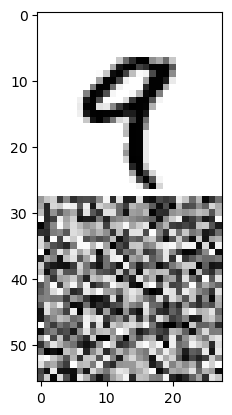

In [6]:
train_image_white4 = train_images_with_noise_channels[4].reshape((56, 28))

import matplotlib.pyplot as plt

digit = train_image_white4
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

영 행렬이 추가된 샘플은 다음과 같이 보인다.

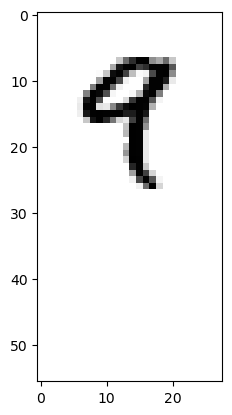

In [7]:
train_image_zeros4 = train_images_with_zeros_channels[4].reshape((56, 28))

import matplotlib.pyplot as plt

digit = train_image_zeros4
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

모델 구성과 컴파일을 함수를 이용하여 지정한다.

- 정수 레이블을 사용하기에 손실함수로 `sparse_categorical_crossentropy` 지정해야 함.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

- 백색 잡음이 추가된 데이터셋 훈련
    - `validation_split`: 검증셋 비율 지정

In [9]:
# 모델 생성 및 훈련
model = get_model()

history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 2ms/step - loss: 0.6182 - accuracy: 0.8106 - val_loss: 0.2823 - val_accuracy: 0.9113
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2522 - accuracy: 0.9206 - val_loss: 0.1821 - val_accuracy: 0.9450
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1631 - accuracy: 0.9495 - val_loss: 0.1351 - val_accuracy: 0.9586
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1163 - accuracy: 0.9635 - val_loss: 0.1823 - val_accuracy: 0.9467
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9733 - val_loss: 0.1415 - val_accuracy: 0.9579
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9796 - val_loss: 0.1780 - val_accuracy: 0.9524
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9844 - val_loss: 0.1385 - val_accuracy: 0.9632
Epoch 

- 영 행렬이 추가된 데이터셋 훈련
    - `validation_split`: 검증셋 비율 지정

In [10]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.9160 - val_loss: 0.1675 - val_accuracy: 0.9492
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1202 - accuracy: 0.9644 - val_loss: 0.1014 - val_accuracy: 0.9698
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9764 - val_loss: 0.0930 - val_accuracy: 0.9728
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.1007 - val_accuracy: 0.9718
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9873 - val_loss: 0.0779 - val_accuracy: 0.9762
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0816 - val_accuracy: 0.9775
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9931 - val_loss: 0.0846 - val_accuracy: 0.9781
Epoch 

- 정확도 비교: 백색 잡음이 포함된 훈련셋을 이용한 모델의 정확도 성능이 1% 이상 낮음.

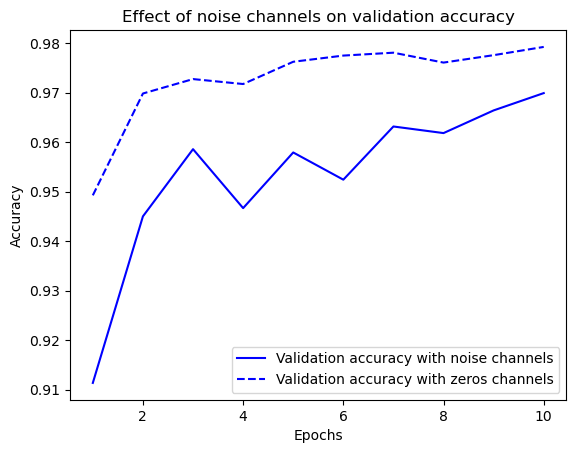

In [11]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")

plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### 5.1.1 딥러닝 모델 일반화

**예제: MNIST 모델을 임의로 섞은 레이블과 함께 훈련시키기**

아래 코드는 임의로 섞은 레이블을 이용하여 손글씨를 예측하는 모델을 훈련시킨다. 

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, random_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 2.3162 - accuracy: 0.1032 - val_loss: 2.3094 - val_accuracy: 0.1046
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2999 - accuracy: 0.1176 - val_loss: 2.3154 - val_accuracy: 0.0997
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2907 - accuracy: 0.1268 - val_loss: 2.3201 - val_accuracy: 0.1031
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2777 - accuracy: 0.1392 - val_loss: 2.3251 - val_accuracy: 0.1038
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2592 - accuracy: 0.1535 - val_loss: 2.3391 - val_accuracy: 0.0983
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2397 - accuracy: 0.1692 - val_loss: 2.3509 - val_accuracy: 0.1063
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2153 - accuracy: 0.1829 - val_loss: 2.3710 - val_accuracy: 0.0978

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9589 - accuracy: 0.6793 - val_loss: 4.6379 - val_accuracy: 0.0963
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9447 - accuracy: 0.6865 - val_loss: 4.6526 - val_accuracy: 0.0976
Epoch 60/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9315 - accuracy: 0.6902 - val_loss: 4.7540 - val_accuracy: 0.1002
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9151 - accuracy: 0.6959 - val_loss: 4.8260 - val_accuracy: 0.0987
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9019 - accuracy: 0.7013 - val_loss: 4.8764 - val_accuracy: 0.0972
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8887 - accuracy: 0.7068 - val_loss: 4.9050 - val_accuracy: 0.0983
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8738 - accuracy: 0.7103 - val_loss: 4.9627 - val_accuracy:

훈련셋에 대한 성능은 훈련하면서 계속 향상되지만 검증셋에 성능은 전혀 향상되지 않는다.

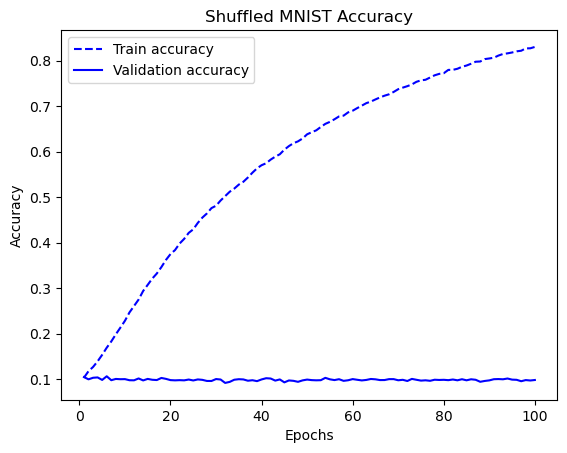

In [13]:
import matplotlib.pyplot as plt

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, 101)

plt.plot(epochs, train_acc, "b--",
         label="Train accuracy")

plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy")

plt.title("Shuffled MNIST Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## 5.2 모델 평가

### 5.2.1 훈련셋, 검증셋, 테스트셋

### 5.2.2. 모델 성능 평가의 기준선

### 5.2.3. 모델 평가용 데이터셋 준비 관련 주의사항

## 5.3 모델 훈련 개선법

**첫째 경우: 경사하강법 관련 파라미터 조정**

_학습률 조정_

* MNIST 모델 훈련: 매우 큰 학습률 사용
    - 학습률: 1 (옵티마이저의 옵션에서 지정)
    - 훈련셋/검증셋에 대한 정확도가 30% 수준에 머무름.

In [14]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 960.1663 - accuracy: 0.3539 - val_loss: 2.6795 - val_accuracy: 0.2491
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 4.3273 - accuracy: 0.2186 - val_loss: 3.1430 - val_accuracy: 0.2199
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 2.8624 - accuracy: 0.2084 - val_loss: 3.3430 - val_accuracy: 0.2362
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.8976 - accuracy: 0.2295 - val_loss: 2.5158 - val_accuracy: 0.3147
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 2.9094 - accuracy: 0.2413 - val_loss: 2.3536 - val_accuracy: 0.2907
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 2.6787 - accuracy: 0.2342 - val_loss: 2.2234 - val_accuracy: 0.2554
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 2.6848 - accuracy: 0.2547 - val_loss: 2.4784 - val_accuracy: 0.2017
Epoc

* MNIST 모델 훈련: 매우 작은 학습률 사용
    - 학습률: 0.000001
    - 검증셋에 대한 정확도가 느리게 증가함

In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-6),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 2.3129 - accuracy: 0.1184 - val_loss: 2.2693 - val_accuracy: 0.1433
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 2.2251 - accuracy: 0.1869 - val_loss: 2.1814 - val_accuracy: 0.2279
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 2.1411 - accuracy: 0.2824 - val_loss: 2.0971 - val_accuracy: 0.3418
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.0605 - accuracy: 0.3864 - val_loss: 2.0162 - val_accuracy: 0.4430
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 1.9829 - accuracy: 0.4736 - val_loss: 1.9380 - val_accuracy: 0.5200
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 1.9079 - accuracy: 0.5391 - val_loss: 1.8623 - val_accuracy: 0.5780
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 1.8351 - accuracy: 0.5901 - val_loss: 1.7891 - val_accuracy: 0.6248
Epoch 

* MNIST 모델 훈련: 적절한 학습률 사용
    - 학습률: 0.01
    - 제대로 훈련됨.

In [16]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.9114 - val_loss: 0.1519 - val_accuracy: 0.9593
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1418 - accuracy: 0.9629 - val_loss: 0.1870 - val_accuracy: 0.9588
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1172 - accuracy: 0.9720 - val_loss: 0.1728 - val_accuracy: 0.9646
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0986 - accuracy: 0.9784 - val_loss: 0.2479 - val_accuracy: 0.9596
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9808 - val_loss: 0.2307 - val_accuracy: 0.9690
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9840 - val_loss: 0.1899 - val_accuracy: 0.9732
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9859 - val_loss: 0.2501 - val_accuracy: 0.9722
Epoch 

**둘째 경우: 보다 적절한 모델 사용**

**셋째 경우: 모델의 정보 저장 능력 조정**

* MNIST 데이터셋 다중클래스 분류: 매우 단순한 모델
    - 은닉층이 없이 출력층 하나만 사용하는 매우 단순한 모델.
    - 검증셋의 정확도: 93% 정도에서 정체
    - 검증셋의 손실값: 0.25 이하로 내려가지 않음.
    - 결론적으로 모델의 정보 저장/분석 능력이 떨어진다. 

In [17]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6615 - accuracy: 0.8417 - val_loss: 0.3587 - val_accuracy: 0.9040
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.9033 - val_loss: 0.3101 - val_accuracy: 0.9126
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.9121 - val_loss: 0.2900 - val_accuracy: 0.9178
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.9162 - val_loss: 0.2831 - val_accuracy: 0.9209
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2891 - accuracy: 0.9196 - val_loss: 0.2763 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2826 - accuracy: 0.9212 - val_loss: 0.2720 - val_accuracy: 0.9239
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2776 - accuracy: 0.9226 - val_loss: 0.2700 - val_accuracy: 0.9246
Epoch 

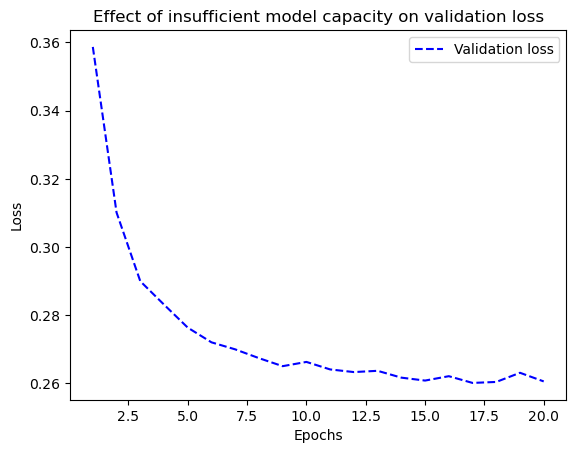

In [18]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

* MNIST 데이터셋 다중클래스 분류: 보다 많은 저장/분석/표현 능력 모델
    - 두 개의 은닉층: 96개의 많은 유닛 사용
    - 잘 훈련되며 과대적합이 발생한다. 

In [19]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8954 - val_loss: 0.2031 - val_accuracy: 0.9387
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1611 - accuracy: 0.9517 - val_loss: 0.1391 - val_accuracy: 0.9600
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9663 - val_loss: 0.1107 - val_accuracy: 0.9663
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9744 - val_loss: 0.0979 - val_accuracy: 0.9718
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9795 - val_loss: 0.0968 - val_accuracy: 0.9723
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9835 - val_loss: 0.0916 - val_accuracy: 0.9735
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0960 - val_accuracy: 0.9730
Epoch 

8 에포크 정도 지나면서 일반화 성능이 떨어진다. 

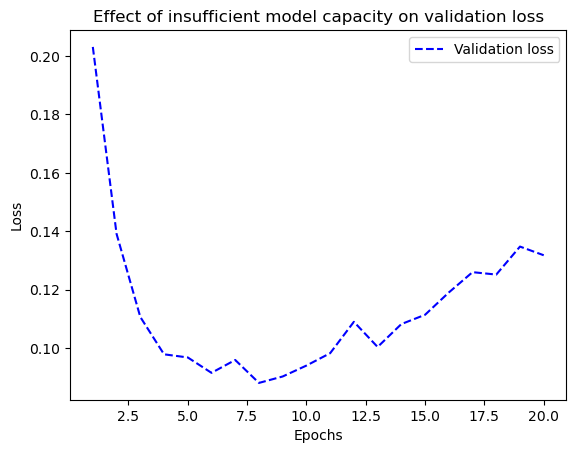

In [20]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## 5.4 일반화 향상법

### 5.4.1. 양질의 데이터셋

### 5.4.2. 특성 공학

### 5.4.3. 조기 종료

### 5.4.4. 규제

**규제 기법 1: 신경망 크기 축소**

아래 코드는 이전에 다루었던 IMDB 데이터셋을 이용한 모델 훈련이다. 

In [21]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5081 - accuracy: 0.7997 - val_loss: 0.3772 - val_accuracy: 0.8735
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3038 - accuracy: 0.9031 - val_loss: 0.3013 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2229 - accuracy: 0.9273 - val_loss: 0.2752 - val_accuracy: 0.8935
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1738 - accuracy: 0.9437 - val_loss: 0.2799 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1417 - accuracy: 0.9562 - val_loss: 0.2807 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1177 - accuracy: 0.9638 - val_loss: 0.3083 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0994 - accuracy: 0.9701 - val_loss: 0.3109 - val_accuracy: 0.8864
Epoch 8/20
30

은닉층의 유닛수를 4로 만들어보자.

In [22]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6160 - accuracy: 0.6573 - val_loss: 0.5612 - val_accuracy: 0.7275
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5170 - accuracy: 0.7950 - val_loss: 0.5176 - val_accuracy: 0.8013
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4693 - accuracy: 0.8615 - val_loss: 0.4921 - val_accuracy: 0.8362
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4351 - accuracy: 0.8943 - val_loss: 0.4775 - val_accuracy: 0.8492
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4075 - accuracy: 0.9166 - val_loss: 0.4625 - val_accuracy: 0.8747
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3832 - accuracy: 0.9339 - val_loss: 0.4547 - val_accuracy: 0.8725
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3611 - accuracy: 0.9462 - val_loss: 0.4812 - val_accuracy: 0.8420
Epoch 8/20
30

기존 모델보다 과대적합이 늦게 발생한다.

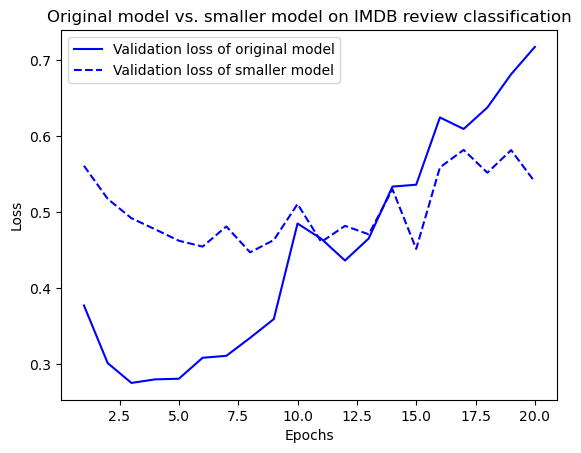

In [23]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller, "b--",
         label="Validation loss of smaller model")

plt.title("Original model vs. smaller model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

이번엔 유닛 수를 크게 늘려보자.

In [24]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5754 - accuracy: 0.7400 - val_loss: 0.3220 - val_accuracy: 0.8815
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2580 - accuracy: 0.8986 - val_loss: 0.2681 - val_accuracy: 0.8933
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1465 - accuracy: 0.9459 - val_loss: 0.3193 - val_accuracy: 0.8726
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0923 - accuracy: 0.9701 - val_loss: 0.3495 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1259 - accuracy: 0.9744 - val_loss: 0.3412 - val_accuracy: 0.8792
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0079 - accuracy: 0.9995 - val_loss: 0.5046 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.7199 - val_accuracy: 0.8553
Epoch 8/20
30

기존 모델과의 차이점은 다음과 같다.

- 과대적합이 매우 빠르게 발생하며, 검증셋에 대한 성능이 매우 불안정하다.

**주의사항**: 검증셋이 너무 작아도 매우 불안정스러울 수 있다.

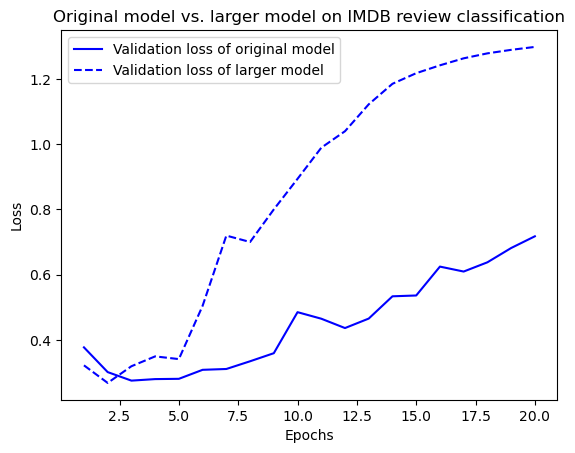

In [25]:
val_loss_original = history_original.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b--",
         label="Validation loss of larger model")

plt.title("Original model vs. larger model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**규제 기법 2: 가중치 규제**

아래 코드는 IMDB 훈련 모델에 L2 규제를 가한 결과를 보여준다.

- `regularizers.l2(0.002)`: 각 가중치의 제곱에 0.002 곱하기
- 규제는 훈련 중에만 적용되며 테스트에는 사용되지 않음.

In [26]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5864 - accuracy: 0.7855 - val_loss: 0.4560 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3974 - accuracy: 0.8941 - val_loss: 0.3882 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3322 - accuracy: 0.9164 - val_loss: 0.3737 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2974 - accuracy: 0.9249 - val_loss: 0.5078 - val_accuracy: 0.8213
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2852 - accuracy: 0.9285 - val_loss: 0.3646 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2662 - accuracy: 0.9381 - val_loss: 0.4036 - val_accuracy: 0.8707
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2617 - accuracy: 0.9374 - val_loss: 0.3834 - val_accuracy: 0.8804
Epoch 8/20
30

L2 규제를 가한 결과는 다음과 같다.

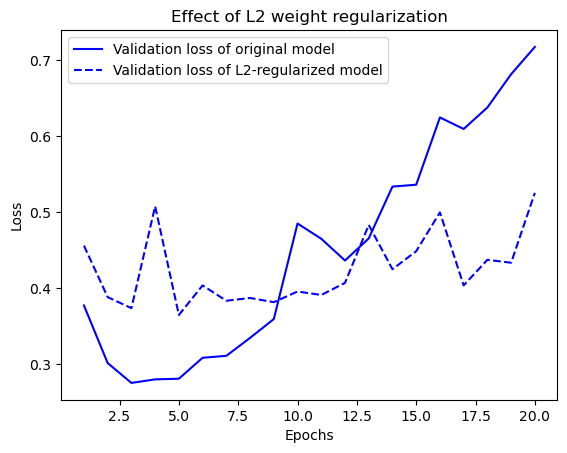

In [27]:
val_loss_original = history_original.history["val_loss"]
val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l2_reg, "b--",
         label="Validation loss of L2-regularized model")

plt.title("Effect of L2 weight regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**규제 기법 3: 드롭아웃 적용**

아래 코드는 IMDB 데이터셋에 드롯아웃을 적용하여 훈련한다.

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5896 - accuracy: 0.6906 - val_loss: 0.4339 - val_accuracy: 0.8622
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4483 - accuracy: 0.8129 - val_loss: 0.3450 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3744 - accuracy: 0.8534 - val_loss: 0.3083 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3150 - accuracy: 0.8848 - val_loss: 0.3173 - val_accuracy: 0.8745
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2706 - accuracy: 0.9047 - val_loss: 0.2814 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2355 - accuracy: 0.9191 - val_loss: 0.2794 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2104 - accuracy: 0.9305 - val_loss: 0.2911 - val_accuracy: 0.8869
Epoch 8/20
30

50%의 드롭아웃을 적용한 결과는 다음과 같다.

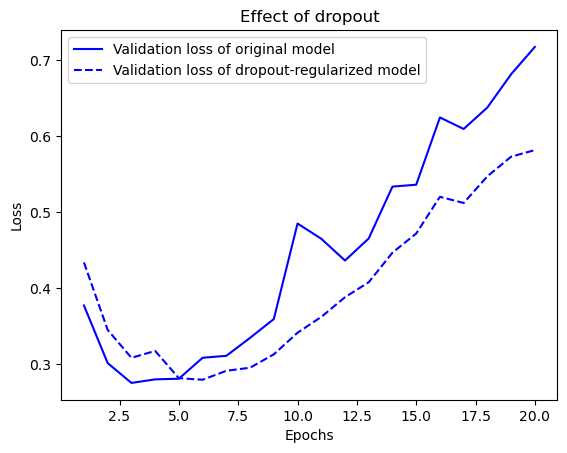

In [29]:
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b--",
         label="Validation loss of dropout-regularized model")

plt.title("Effect of dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()